# TIME SERIES ANALYSIS

## Goal: Find outliers, trends and periodicity in the MTA turnstile data

In [1]:
#Import packages
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import statsmodels.api as sm

s = json.load(open(os.getenv('PUI2015')+'/PUI2015_MMajumdar/pui.json'));
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### TASK 1

In [2]:
#Reading the data cube
mtaData = np.load('MTA_Fare.npy')
mtaData.shape

(600L, 23L, 194L)

In [3]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [4]:
#Creating the date range
mtaDatesRange = pd.date_range('05/21/2010', periods=194, freq='W')

In [5]:
#Converting data to float type
mtaData = mtaData.astype(float)
print mtaData.dtype

float64


In [6]:
#Substituting for negative values in data with NaN
mtaData = np.where(mtaData != -1, mtaData, np.nan)

In [7]:
#Obtaining stations after summing all ridetypes
mtaStations = np.nansum(mtaData, axis=1)
print mtaStations.shape

(600L, 194L)


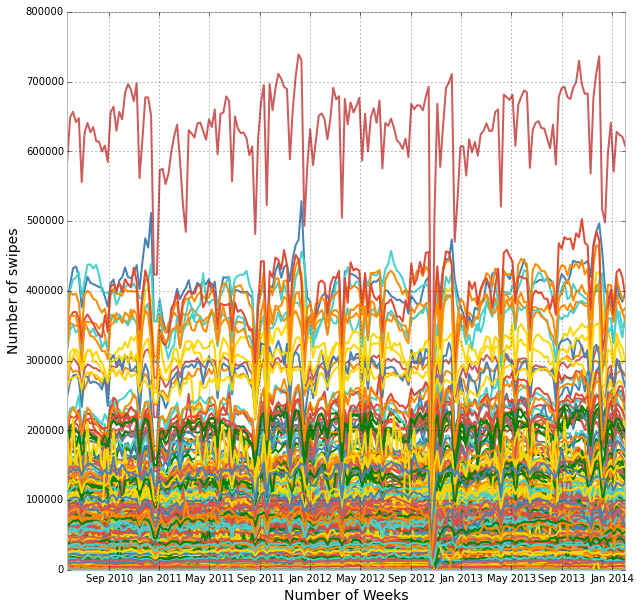

In [8]:
#Plotting it
plt.figure(figsize=(10, 10))
#Transpose to get time along the x asis
fugure1 = pl.plot(mtaDatesRange, np.transpose(mtaStations))
pl.ylabel('Number of swipes', fontsize = 14)
pl.xlabel('Number of Weeks', fontsize = 14)
pl.colors()

In [9]:
#Getting threshold for events
thresholds = [np.nanmean(mtaStations, axis = 1) + 3 * np.nanstd(mtaStations, axis = 1), 
              np.nanmean(mtaStations, axis = 1) - 3 * np.nanstd(mtaStations, axis = 1)]

In [10]:
#Obtaining the event that exceeds threshold
event = [np.where(ts < thresholds[1][i]) for i,ts in enumerate(mtaStations)]
print event[0]

(array([127, 128, 129, 130], dtype=int64),)


### Result: The most prominent event is in October 2012. It is the Hurricane Sandy that hit New York.

### TASK 2

In [11]:
#Obtaining ridetypes after summing stations
mtaTypes = np.nansum(mtaData, axis=0)
print mtaTypes.shape

(23L, 194L)


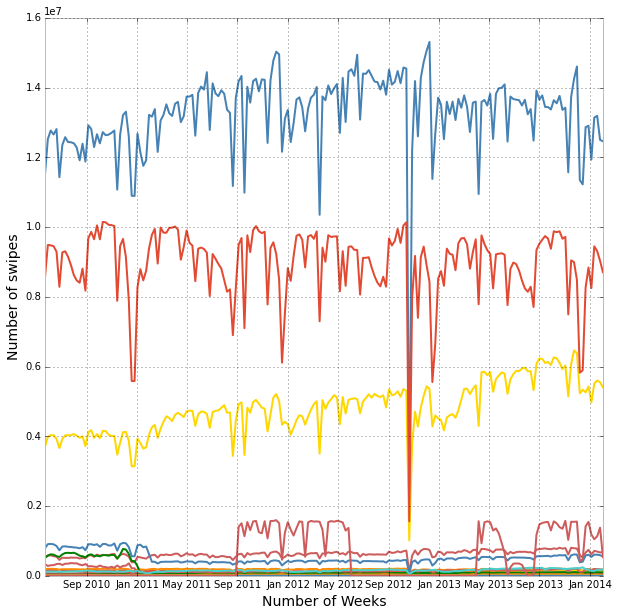

In [12]:
#Plotting it
plt.figure(figsize=(10, 10))
#Transpose to get time along the x asis
figure2 = pl.plot(mtaDatesRange, np.transpose(mtaTypes))
pl.ylabel('Number of swipes', fontsize = 14)
pl.xlabel('Number of Weeks', fontsize = 14)
pl.colors()

In [13]:
#Performing rolling mean
typesRollingMean = pd.rolling_mean(np.transpose(mtaTypes), 10)
print typesRollingMean.shape

(194L, 23L)


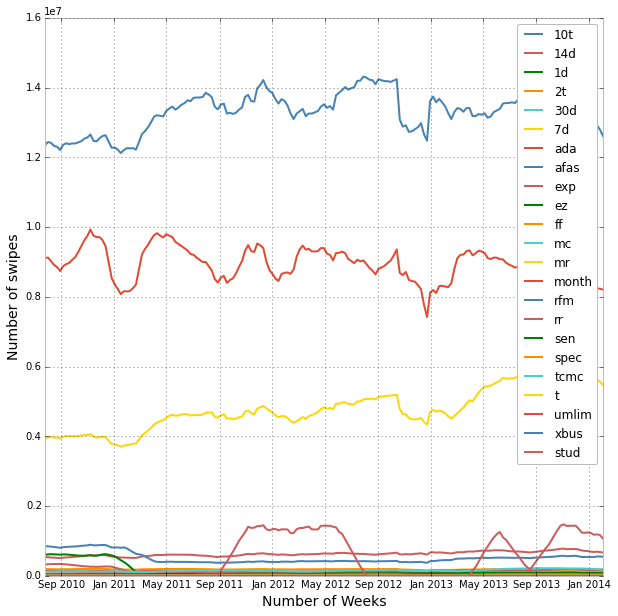

In [14]:
#Plotting it
plt.figure(figsize=(10, 10))
figure3 = pl.plot(mtaDatesRange, typesRollingMean)
pl.ylabel('Number of swipes', fontsize = 14)
pl.xlabel('Number of Weeks', fontsize = 14)
pl.colors()
pl.legend(ridetype)

[  9.85855761e-01   7.96898334e-01   9.01896857e-01   1.07217516e+00
   9.83155326e-01   7.26253084e-01   1.11214933e+00   4.80765217e+03
   9.42633429e+04   6.82381556e+05   1.23714609e+00   8.30622261e-01
   3.89558171e-05   1.74222625e+00   1.54426917e+00   3.87513943e-01
   3.47208425e-01   5.46373828e-02   6.53059649e-01   9.80984190e-01
   1.26020779e+00   6.18746842e-01   0.00000000e+00]


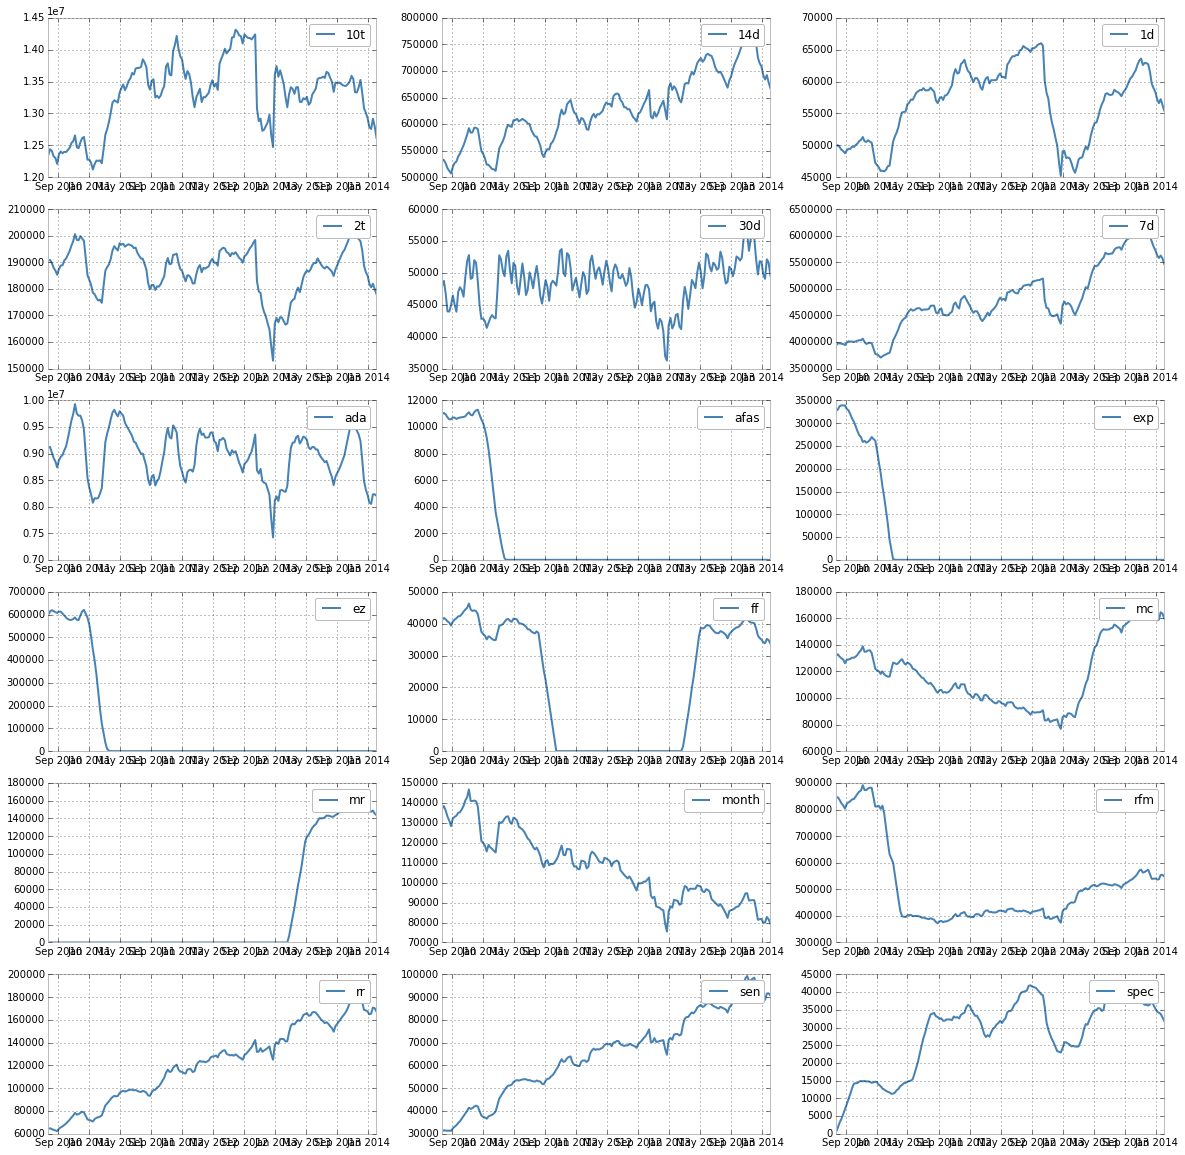

In [15]:
#Calculating ratio of beginning to end for ridertypes
rollingRatioTypes = typesRollingMean[10,:]/typesRollingMean[193,:]
plt.figure(figsize=(20,20))
n = 1; j = 0
for i in rollingRatioTypes:
    if i > 0.9 and i < 1.1:
        continue
        j = j + 1
    else:
        pl.subplot(6, 3, n)
        figure4 = pl.plot(mtaDatesRange, typesRollingMean[:, j])
        pl.legend(ridetype[j:])
        pl.colors()
        n = n + 1; 
        j = j + 1
print rollingRatioTypes

In [16]:
#Printing trend for each ridership type
for i,j in enumerate(ridetype):
    print "%s changed in ridership at a rate %f" % (j, rollingRatioTypes[i])

10t changed in ridership at a rate 0.985856
14d changed in ridership at a rate 0.796898
1d changed in ridership at a rate 0.901897
2t changed in ridership at a rate 1.072175
30d changed in ridership at a rate 0.983155
7d changed in ridership at a rate 0.726253
ada changed in ridership at a rate 1.112149
afas changed in ridership at a rate 4807.652174
exp changed in ridership at a rate 94263.342857
ez changed in ridership at a rate 682381.555556
ff changed in ridership at a rate 1.237146
mc changed in ridership at a rate 0.830622
mr changed in ridership at a rate 0.000039
month changed in ridership at a rate 1.742226
rfm changed in ridership at a rate 1.544269
rr changed in ridership at a rate 0.387514
sen changed in ridership at a rate 0.347208
spec changed in ridership at a rate 0.054637
tcmc changed in ridership at a rate 0.653060
t changed in ridership at a rate 0.980984
umlim changed in ridership at a rate 1.260208
xbus changed in ridership at a rate 0.618747
stud changed in riders

### Results: From the results obtained above, we see that

1. 14d, 7d, mc, rr, sen, spec show an increasing trend

2. afas, exp, ez, month, rfm show a downward trend

### TASK 3

C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


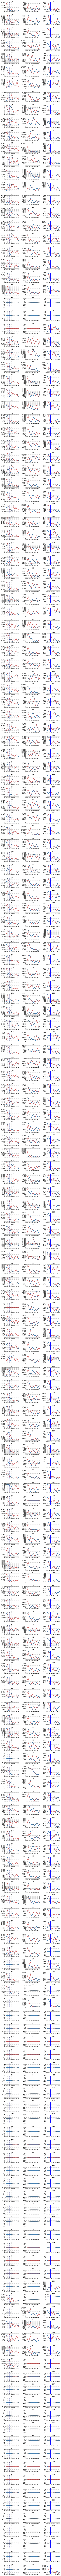

In [17]:
#Applying fourier transform on stations data
fourier = np.abs(np.fft.rfft(mtaStations))
fourier.shape

fig = plt.figure(figsize=(10,400))
mtaAll = pd.DataFrame(mtaStations)

#Plotting 600 plots in for loop
for i in range(600):
    figure5 = fig.add_subplot(200,3,i)
    fourier = np.abs(np.fft.rfft(mtaAll.loc[i,:]))
    figure5.plot(np.fft.rfftfreq(194, 1.0)[1:], (fourier)[1:], 'o', ms = 8)
    figure5.set_title("%i" %(i-1))
    figure5.plot(np.fft.rfftfreq(194, 1.0)[1:], (fourier)[1:], '-')
    figure5.set_xlim(0,1.0/15)
    plt.axvline(1.0/52)
    pl.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)

### Identifying the 4 stations with the most prominent periodic trend

In [18]:
stations = {}
for i in range(600):
    stations[i] = np.abs(np.fft.rfft(mtaStations[i-1])[4])


import operator
prominentStations = sorted(stations.items(), key=operator.itemgetter(1))

print("The stations with the most prominent periodic trend are as follows: ")
print(prominentStations[594:600])

The 4 stations with the most prominent periodic trend are as follows: 
[(540, 1351574.8989024682), (33, 2329896.5813884311), (328, 2402218.5809588572), (151, 2931895.8769513387), (195, 2950388.929214194), (1, 2980160.6355953491)]


### Result: The four stations with the most prominent periodic trend are stations 540, 33, 328 and 151.